In [1]:
# sklearn 0.19
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import pandas as pd
from sklearn import datasets, svm, tree, preprocessing, metrics
# because cv is depressed since 1.8, do below
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score

import sklearn.ensemble as ske
import tensorflow as tf
#from tensorflow.contrib.learn import skflow
import tensorflow.contrib.learn as skflow

# Load, play and preprocess the dataset

In [2]:
raw_df = pd.read_csv('./train.csv')
raw_df.columns = map(str.lower, raw_df.columns)
titanic_df = raw_df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']].copy()
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [3]:
class_sex_grouping = titanic_df.groupby(['pclass','sex']).mean()
class_sex_grouping

survived        age     sibsp     parch        fare
pclass sex                                                        
1      female  0.968085  34.611765  0.553191  0.457447  106.125798
       male    0.368852  41.281386  0.311475  0.278689   67.226127
2      female  0.921053  28.722973  0.486842  0.605263   21.970121
       male    0.157407  30.740707  0.342593  0.222222   19.741782
3      female  0.500000  21.750000  0.895833  0.798611   16.118810
       male    0.135447  26.507589  0.498559  0.224784   12.661633

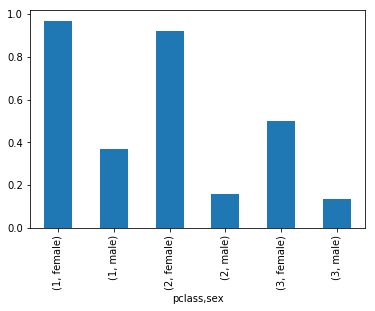

In [4]:
class_sex_grouping['survived'].plot.bar()

In [5]:
# titanic_df['sex'].unique()
# sexes = sorted(titatitanic_df['sex'].unique()
# sexes = sorted(titanic_df['sex'].unique())
# genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
# titanic_df['sex_mod'] = titanic_df['sex'].map(genders_mapping).astype(int)

# titanic_df['embarked'].fillna('-', inplace=True)
# embarked_locs = sorted(titanic_df['embarked'].unique())
# embarked_locs_mapping = dict(zip(embarked_locs, range(0, len(embarked_locs) + 1)))
# embarked_locs_mapping
# titanic_df['embarked_Mod'] = titanic_df['embarked'].map(embarked_locs_mapping).astype(int)

# titanic_df['age_mod'] = titanic_df['age']
# titanic_df['age_mod'] = titanic_df['age_mod'].groupby([titanic_df['sex_mod'], titanic_df['pclass']]).apply(lambda x: x.fillna(x.median()))

# titanic_df = titanic_df.drop(['age','sex','embarked'], axis=1)

# titanic_df.count()nic_df['sex'].unique())
# genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
# titanic_df['sex_mod'] = titanic_df['sex'].map(genders_mapping).astype(int)

# titanic_df['embarked'].fillna('-', inplace=True)
# embarked_locs = sorted(titanic_df['embarked'].unique())
# embarked_locs_mapping = dict(zip(embarked_locs, range(0, len(embarked_locs) + 1)))
# embarked_locs_mapping
# titanic_df['embarked_Mod'] = titanic_df['embarked'].map(embarked_locs_mapping).astype(int)

# titanic_df['age_mod'] = titanic_df['age']
# titanic_df['age_mod'] = titanic_df['age_mod'].groupby([titanic_df['sex_mod'], titanic_df['pclass']]).apply(lambda x: x.fillna(x.median()))

# titanic_df = titanic_df.drop(['age','sex','embarked'], axis=1)

# titanic_df.count()

In [6]:
def preprocess_titanic_df(df):
    processed_df = df.copy()
    le = preprocessing.LabelEncoder()
    processed_df.sex = le.fit_transform(processed_df.sex)
    processed_df.embarked = processed_df.embarked.fillna('-')
    # inplace..
    processed_df.embarked = le.fit_transform(processed_df.embarked)
    processed_df['age'] = titanic_df['age'].groupby([titanic_df['sex'], titanic_df['pclass']]).apply(lambda x: x.fillna(x.median()))

    processed_df = processed_df.drop(['name','ticket', "cabin"],axis=1)
    return processed_df

In [7]:
processed_df = preprocess_titanic_df(raw_df)
processed_df

,passengerid,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,1,0,3,1,22.0,1,0,7.2500,3
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,3
3,4,1,1,0,35.0,1,0,53.1000,3
4,5,0,3,1,35.0,0,0,8.0500,3
5,6,0,3,1,25.0,0,0,8.4583,2
6,7,0,1,1,54.0,0,0,51.8625,3
7,8,0,3,1,2.0,3,1,21.0750,3
8,9,1,3,0,27.0,0,2,11.1333,3
9,10,1,2,0,14.0,1,0,30.0708,1


# Split the data

In [8]:
X = processed_df.drop(['survived'], axis=1).values
y = processed_df['survived'].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Decision Tree

In [10]:
clf_dt = tree.DecisionTreeClassifier(criterion="entropy", max_depth=10)
clf_dt.fit(features, label)
clf_dt.score(features_test, label_test)
# pd.DataFrame(data=X_train)
# org = pd.DataFrame(data=y_train) 
# se = pd.Series(predicted)
# org['predicted'] = se.values
# org

0.7988826815642458

#

In [11]:
shuffle_validator = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
def test_classifier(clf):
    scores = cross_val_score(clf, X, y, cv=shuffle_validator)
    print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std()))

In [12]:
test_classifier(clf_dt)

Accuracy: 0.7922 (+/- 0.03)


# Other simple Classification

The **“Random Forest”** classification algorithm will create a multitude of (generally very poor) trees for the data set using different random subsets of the input variables, and will return whichever prediction was returned by the most trees. This helps to avoid “overfitting”, a problem that occurs when a model is so tightly fitted to arbitrary correlations in the training data that it performs poorly on test data.

The **“Gradient Boosting”** classifier will generate many weak, shallow prediction trees and will combine, or “boost”, them into a strong model. This model performs very well on our data set, but has the drawback of being relatively slow and difficult to optimize, as the model construction happens sequentially so it cannot be parallelized.

A **“Voting”** classifier can be used to apply multiple conceptually divergent classification models to the same data set and will return the majority vote from all of the classifiers. For instance, if the gradient boosting classifier predicts that a passenger will not survive, but the decision tree and random forest classifiers predict that they will live, the voting classifier will chose the latter.


In [13]:
clf_rf = ske.RandomForestClassifier(n_estimators=50)
test_classifier(clf_rf)

Accuracy: 0.8274 (+/- 0.03)


In [14]:
clf_gb = ske.GradientBoostingClassifier(n_estimators=50)
test_classifier(clf_gb)

Accuracy: 0.8318 (+/- 0.03)


In [15]:
eclf = ske.VotingClassifier([('dt', clf_dt), ('rf', clf_rf), ('gb', clf_gb)])
test_classifier(eclf)

Accuracy: 0.8332 (+/- 0.03)


# Deep Neural Networks - Tensorflow

In [16]:
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=4)]

tf_clf_dnn = skflow.DNNClassifier(
    feature_columns=feature_columns,
    hidden_units=[20, 40, 20], 
    n_classes=2, 
    model_dir="./titanic_DNN_model")
tf_clf_dnn.fit(
    x=X_train, 
    y=y_train,
    steps=200)
tf_clf_dnn.evaluate(X_test, y_test)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001FE6EABDC88>, '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_save_checkpoints_steps': None, '_environment': 'local', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_master': '', '_keep_checkpoint_every_n_hours': 10000, '_is_chief': True, '_task_id': 0, '_save_summary_steps': 100, '_keep_checkpoint_max': 5, '_task_type': None, '_tf_random_seed': None, '_evaluation_master': ''}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, 

C:\Users\user\Anaconda3\envs\py35\lib\site-packages\tensorflow\python\util\deprecation.py:247: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 201 into ./titanic_DNN_model\model.ckpt.
INFO:tensorflow:loss = 0.626438, step = 201
INFO:tensorflow:global_step/sec: 303.603
INFO:tensorflow:loss = 0.617631, step = 301
INFO:tensorflow:Saving checkpoints for 400 into ./titanic_DNN_model\model.ckpt.
INFO:tensorflow:Loss for final step: 0.608085.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Est

{'accuracy': 0.73184359,
 'accuracy/baseline_label_mean': 0.35195529,
 'accuracy/threshold_0.500000_mean': 0.73184359,
 'auc': 0.72194856,
 'global_step': 400,
 'labels/actual_label_mean': 0.35195529,
 'labels/prediction_mean': 0.32215518,
 'loss': 0.58568209,
 'precision/positive_threshold_0.500000_mean': 0.7027027,
 'recall/positive_threshold_0.500000_mean': 0.41269842}

In [17]:
prediction = tf_clf_dnn.predict(X_test)
#passenger_set[passenger_set.survived != prediction]
predictions = list(tf_clf_dnn.predict(X_test))
#X_test

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))


C:\Users\user\Anaconda3\envs\py35\lib\site-packages\tensorflow\python\util\deprecation.py:247: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
